In [27]:
import pandas as pd
import numpy as np

# CSV from JHU adapted via Excel to show the number of new cases in each country per day (Jan 23 to June 28)
#newCases = pd.read_csv('time_series_covid19_newcases_global_June28.csv', index_col='Country/Region')
newCases = pd.read_csv('StateTimeSeries.csv', index_col='State')

# Rotate the dataframe so states = columns
newCases = newCases.transpose()

# Delete latitude and longitude rows
#newCases = newCases.drop(['Lat', 'Long'])

# Display dataframe
newCases

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/23/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/2020,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/1/2020,917.0,38.0,4877.0,420.0,7263.0,314.0,58.0,36.0,38.0,6563.0,...,62.0,1806.0,9308.0,499.0,2.0,416.0,611.0,74.0,540.0,27.0
7/2/2020,1149.0,39.0,3340.0,878.0,7869.0,323.0,74.0,221.0,25.0,10109.0,...,67.0,1575.0,6769.0,554.0,17.0,532.0,716.0,74.0,539.0,36.0
7/3/2020,1754.0,46.0,4427.0,547.0,3964.0,260.0,71.0,192.0,45.0,9488.0,...,85.0,1822.0,6454.0,596.0,9.0,658.0,627.0,73.0,579.0,32.0
7/4/2020,997.0,47.0,2695.0,587.0,2381.0,254.0,0.0,73.0,12.0,11458.0,...,50.0,1428.0,6562.0,676.0,2.0,716.0,469.0,79.0,738.0,24.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f059ddb8668>,
      dtype=object)

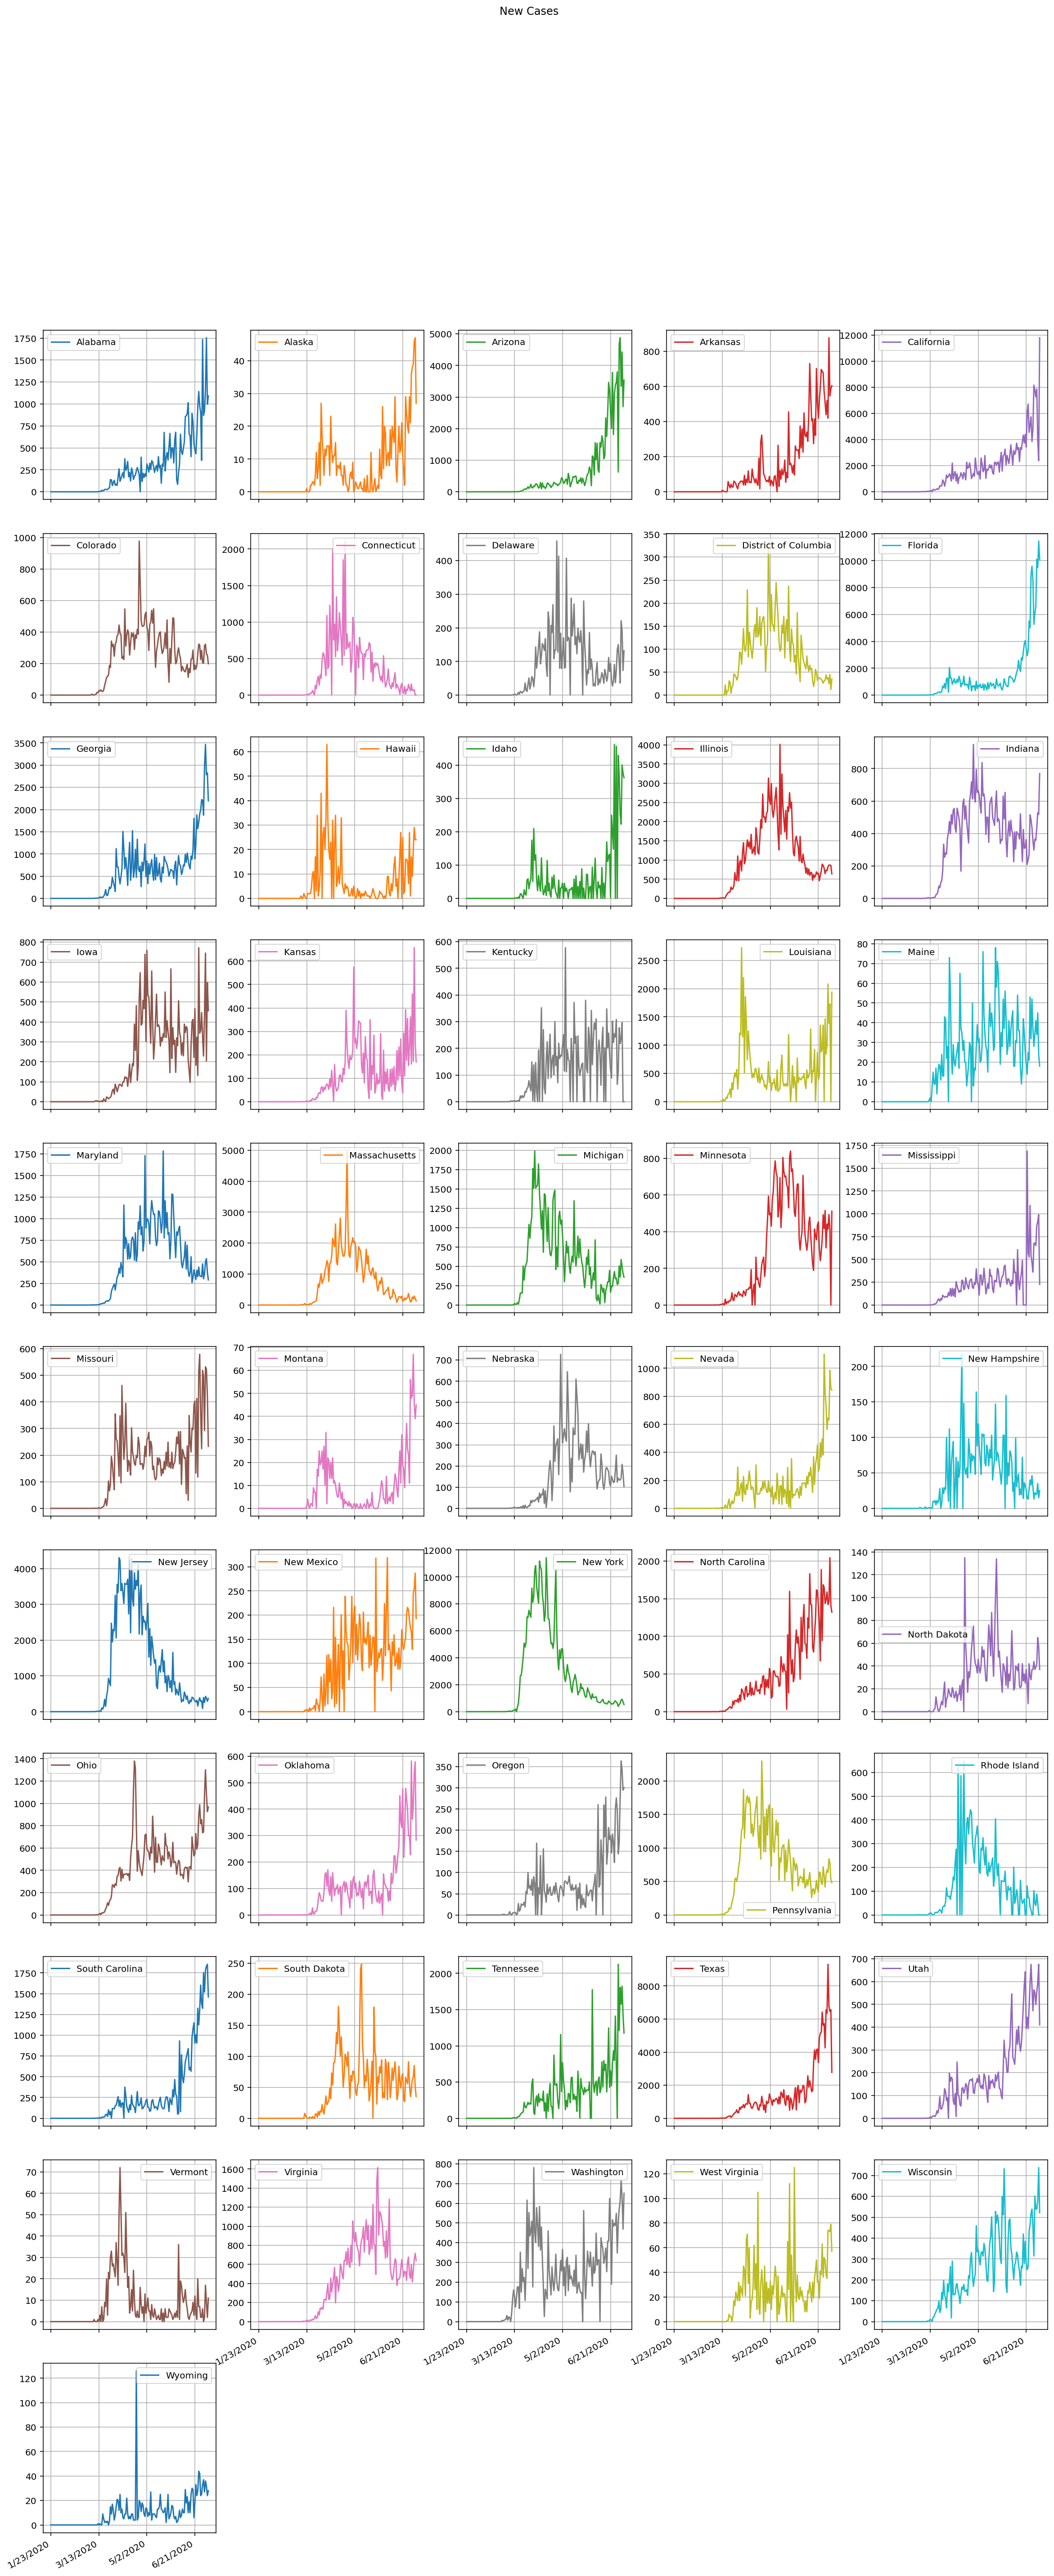

In [2]:
newCases.interpolate(method='linear').plot(kind='line', subplots=True, grid=True, title="New Cases", layout=(11,5), figsize=(20,50))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05957684a8>,
      dtype=object)

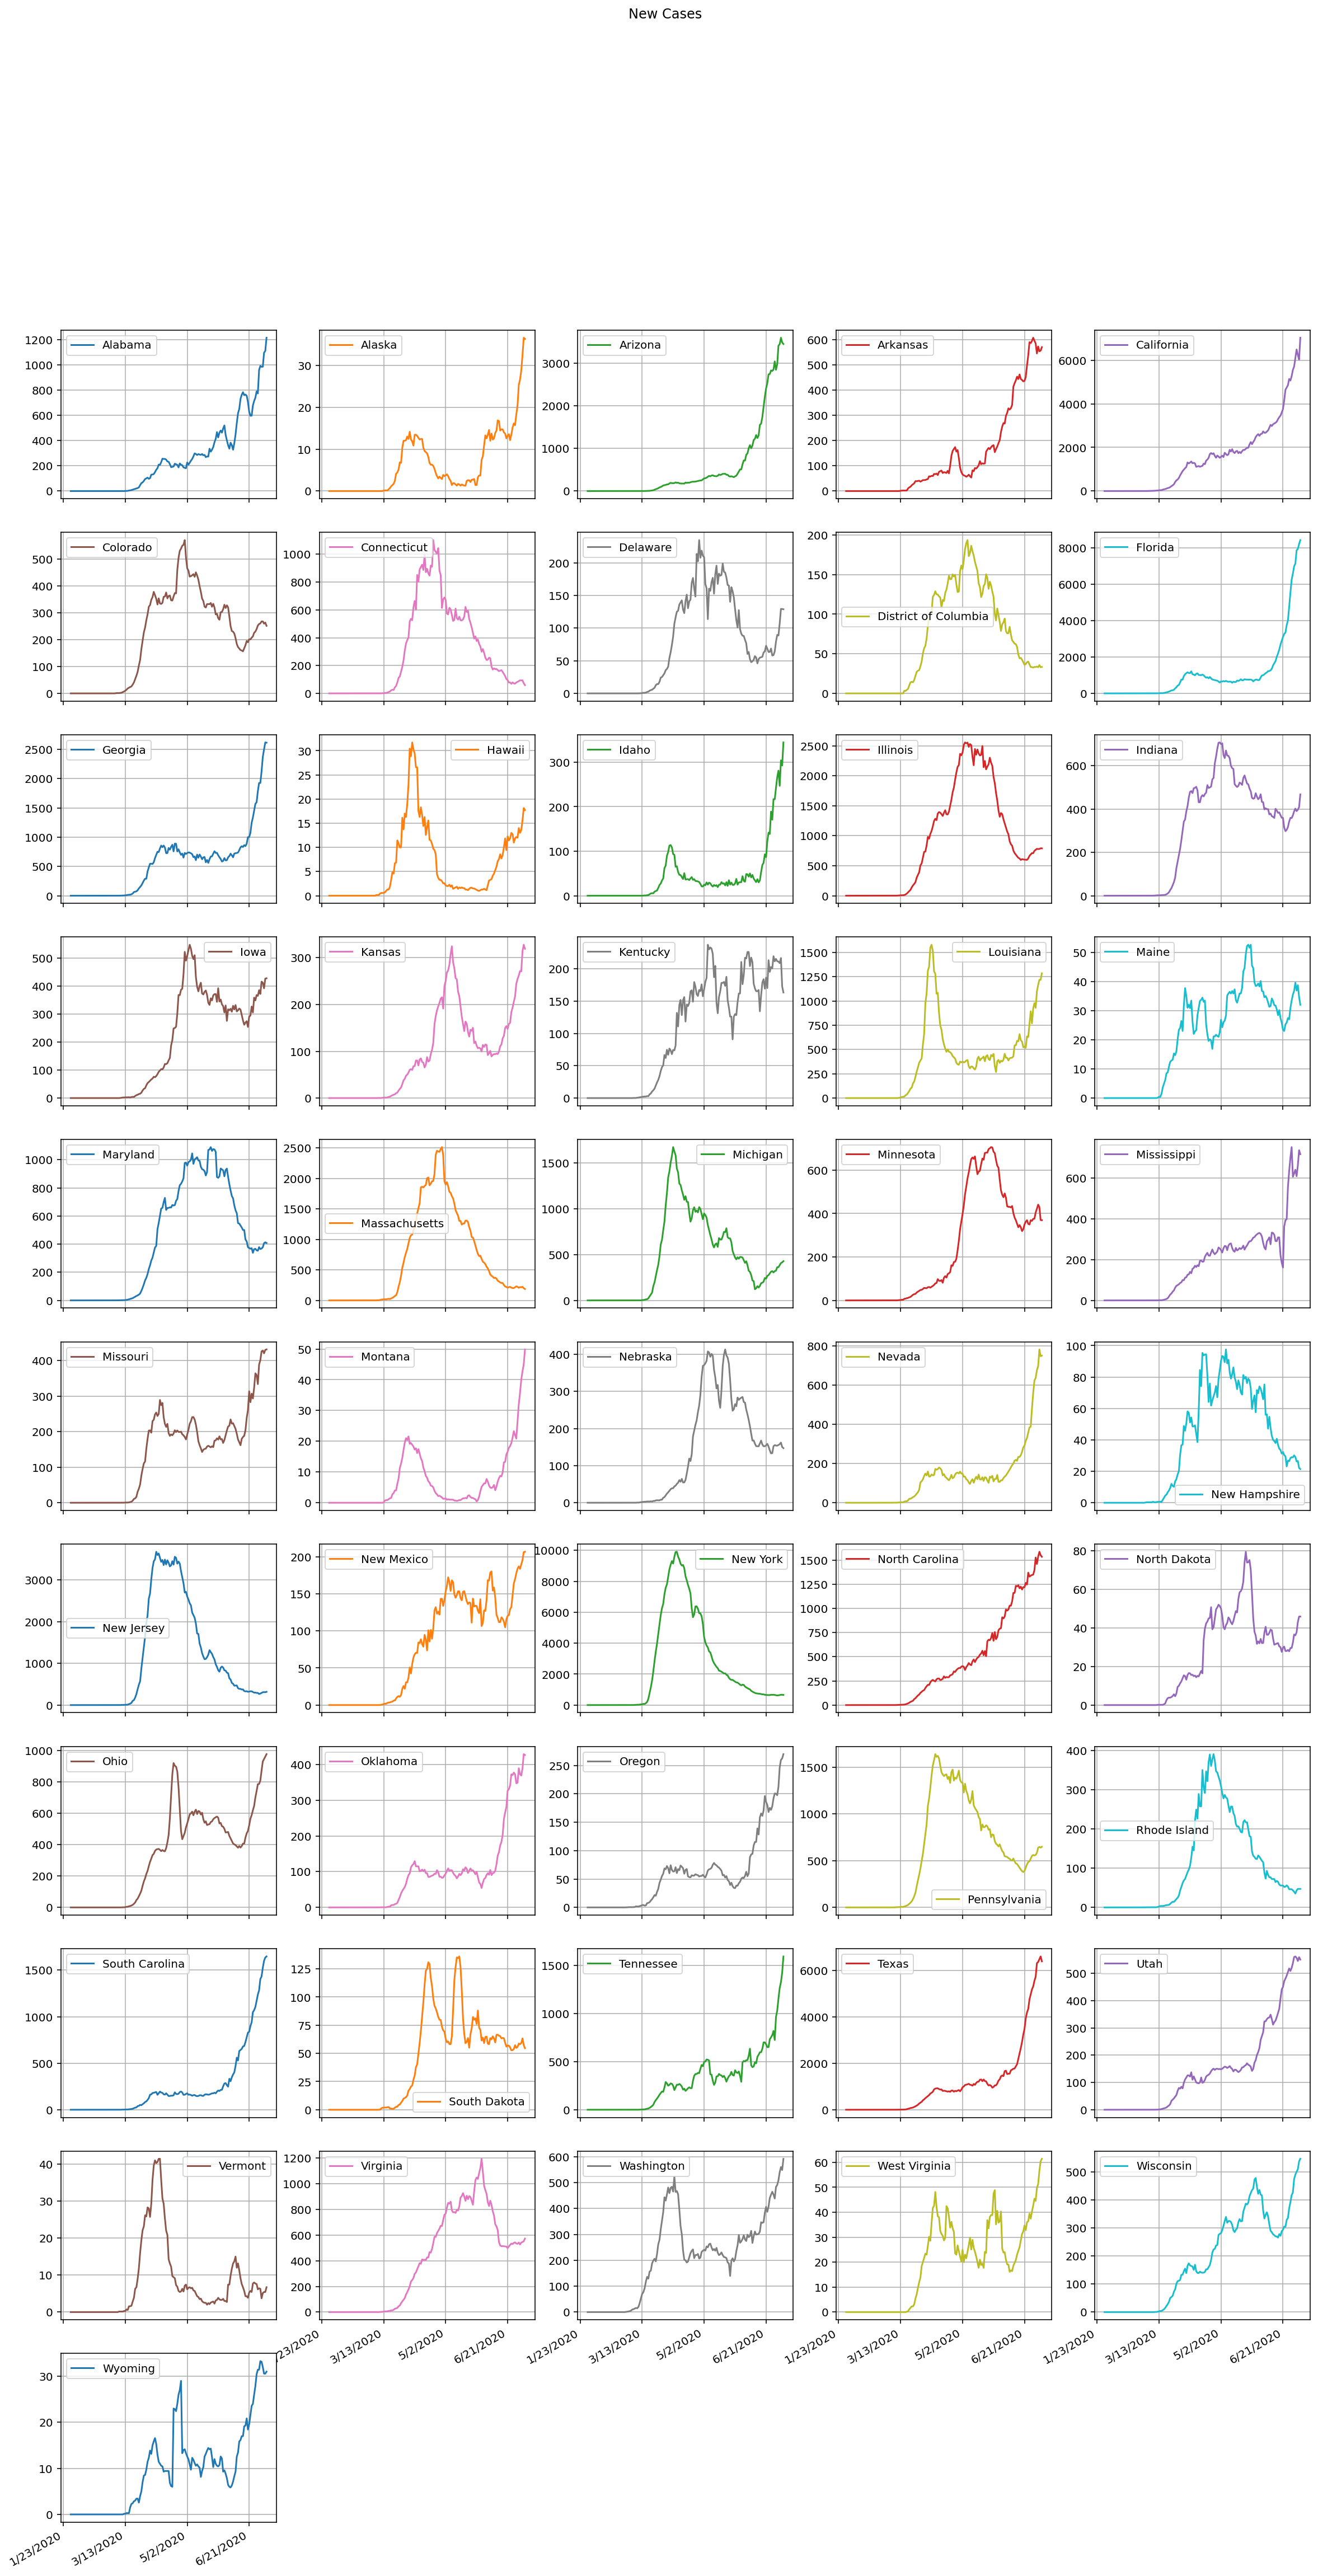

In [3]:
#newCases.plot.line(subplots=True)


# Plot each column of data as line plots. For missing data, connect the previous and following dots with line segments
#newCases.interpolate(method='linear').plot(kind='line', subplots=True, grid=True, title="New Cases", layout=(26, 7), figsize=(25,80))
newCases.interpolate(method='linear').rolling(7).mean().plot(kind='line', subplots=True, grid=True, title="New Cases", layout=(11,5), figsize=(20,40))

In [11]:
import numpy
import pandas
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import AdaBoostClassifier
import random
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

In [25]:
def runClassifier(X, y, iterations, neighbors,classifier):
    quality = numpy.zeros([iterations,3])

    for counter in range(iterations):
        # Normalize X data
        X_normalized = normalize(X.to_numpy(), axis=0)

        # Randomly sample 75% of data for training and 25% for testing
        X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25)

        # Define the classifier and fit it to the data
        if classifier == 'AdaBoost':
            clf = AdaBoostClassifier(n_estimators=50, learning_rate=1)

        if classifier == 'kNN':
            clf = KNeighborsClassifier(n_neighbors = neighbors)

        if classifier == 'XGBoost':
            clf = XGBClassifier()

        clf.fit(X_train, y_train)

        # Find predicted y values
        y_pred = clf.predict(X_test)

        # Return accuracy, precision, and recall for both cases
        accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
        precision = sklearn.metrics.precision_score(y_test, y_pred)
        recall = sklearn.metrics.recall_score(y_test, y_pred)

        quality[counter,:] = numpy.array([accuracy, precision, recall])

    return numpy.median(quality, axis = 0)

In [13]:
def pruneVariables(X,y,samples,maxLoss,neighbors,classifier):

    columns = list(X)

    while len(columns) > 1:
        columns = list(X)
        random.shuffle(columns)
        bestQualityChange = -1

        quality = runClassifier(X,y,samples,neighbors,classifier)
        #print('With', len(columns), 'variables, we find average quality metrics', quality, 'in', samples, 'iterations')

        for column in columns:

            # Drop the column and find the change in quality with all variables
            newX = X.drop([column], axis=1)
            newQuality = runClassifier(newX,y,samples,neighbors,classifier)
            newQualityChange = newQuality - quality

            #print(list(newX))
            #print('The performance after losing the variable', column, 'is', newQuality)

            # If all metrics improve by removing a column, remove it and break the loop
            if (newQualityChange > 0).all():
                #print('We are dropping column', column, 'because all quality metrics improved by', newQualityChange)
                X = newX
                break

            else:
                # Sum the losses. If it's better than all others so far, name this column the worstColumn
                sumOfNegQualityChange = sum((newQualityChange<0)*newQualityChange)
                #print(sumOfNegQualityChange)

                if sumOfNegQualityChange > bestQualityChange:
                    worstColumn = column
                    bestQualityChange = sumOfNegQualityChange

                if column == columns[-1]:
                    if bestQualityChange < -maxLoss:
                        #print('Removing each variable results total losses in the quality metrics more than', maxLoss)
                        return columns, quality

                    # Remove the worst column from X and columns
                    # print('We are dropping column', worstColumn, 'and quality metrics changed by', bestQualityChange)
                    X = X.drop([worstColumn], axis=1)

In [26]:
#Read data from CSV file
data = pandas.read_csv('StateData.csv')

In [0]:
# X is the predictors
X = data.drop(['State', 'SecondPeak'], axis=1)

# y is the targets
y = data.SecondPeak.to_numpy()

# number of iterations to run
samples = 100

# maximum allowable loss
maxLoss = 0.1

neighbors = 5
classifier = 'kNN'

# run the pruning algorithm + k-NN
print("Run 1")
pruneVariables(X,y,samples,maxLoss,neighbors,classifier)

In [116]:
data = pandas.read_csv('StateData.csv')
X = data.drop(['State', 'SecondPeak'], axis=1)
y = data.SecondPeak.to_numpy()

print("Run 2 \n")
pruneVariables(X,y,samples,maxLoss,neighbors)

Run 2 



With 14 variables, we find average quality metrics [0.69230769 0.70714286 0.85714286] in 100 iterations


We are dropping column Day of First Case and quality metrics changed by 0.0


With 13 variables, we find average quality metrics [0.76923077 0.75       0.85714286] in 100 iterations


We are dropping column Total Cases and quality metrics changed by 0.0


With 12 variables, we find average quality metrics [0.73076923 0.71428571 0.875     ] in 100 iterations


We are dropping column High School Completion and quality metrics changed by 0.0


With 11 variables, we find average quality metrics [0.76923077 0.75       0.85714286] in 100 iterations


We are dropping column Averages Cases Since First Case and quality metrics changed by 0.0


With 10 variables, we find average quality metrics [0.76923077 0.75       0.85714286] in 100 iterations


We are dropping column Day of First Peak and quality metrics changed by 0.0


With 9 variables, we find average quality metrics [0.76923077 0.76388889 0.85714286] in 100 iterations


We are dropping column Expenditure per Student and quality metrics changed by 0.0


With 8 variables, we find average quality metrics [0.76923077 0.8        0.85714286] in 100 iterations


We are dropping column Avg Teacher's Salary because all quality metrics improved by [0.07692308 0.05714286 0.01785714]


With 7 variables, we find average quality metrics [0.76923077 0.85714286 0.85714286] in 100 iterations


We are dropping column Violent crimes (per 100,000) and quality metrics changed by 0.0


With 6 variables, we find average quality metrics [0.84615385 0.83333333 0.875     ] in 100 iterations


We are dropping column Pupil/Teacher Ratio and quality metrics changed by -0.017857142857142905


With 5 variables, we find average quality metrics [0.84615385 0.85714286 0.875     ] in 100 iterations


Removing each variable results total losses in the quality metrics more than 0.1


(['First Peak Height',
  'Days from First Case to First Peak',
  'Crime Rate (per 100,000)',
  'Population',
  'Population Density'],
 array([0.84615385, 0.85714286, 0.875     ]))

In [115]:
data = pandas.read_csv('StateData.csv')
X = data.drop(['State', 'SecondPeak'], axis=1)
y = data.SecondPeak.to_numpy()

print("Run 3 \n")
pruneVariables(X,y,samples,maxLoss,neighbors)

Run 3 



With 14 variables, we find average quality metrics [0.76923077 0.73863636 0.85714286] in 100 iterations


We are dropping column Total Cases and quality metrics changed by 0.0


With 13 variables, we find average quality metrics [0.76923077 0.80909091 0.83333333] in 100 iterations


We are dropping column First Peak Height and quality metrics changed by -0.03131313131313129


With 12 variables, we find average quality metrics [0.76923077 0.75       0.83333333] in 100 iterations


We are dropping column Averages Cases Since First Case and quality metrics changed by 0.0


With 11 variables, we find average quality metrics [0.76923077 0.75       0.85714286] in 100 iterations


We are dropping column Day of First Peak and quality metrics changed by 0.0


With 10 variables, we find average quality metrics [0.76923077 0.72077922 0.88194444] in 100 iterations


We are dropping column Day of First Case and quality metrics changed by -0.024801587301587324


With 9 variables, we find average quality metrics [0.76923077 0.75       0.85714286] in 100 iterations


We are dropping column High School Completion and quality metrics changed by 0.0


With 8 variables, we find average quality metrics [0.76923077 0.75       0.85714286] in 100 iterations


We are dropping column Crime Rate (per 100,000) and quality metrics changed by 0.0


With 7 variables, we find average quality metrics [0.76923077 0.77777778 0.875     ] in 100 iterations


We are dropping column Avg Teacher's Salary and quality metrics changed by -0.022817460317460347


With 6 variables, we find average quality metrics [0.76923077 0.8        0.875     ] in 100 iterations


We are dropping column Population Density and quality metrics changed by -0.022222222222222254


With 5 variables, we find average quality metrics [0.76923077 0.71428571 0.85714286] in 100 iterations


We are dropping column Pupil/Teacher Ratio and quality metrics changed by -0.023809523809523725


With 4 variables, we find average quality metrics [0.69230769 0.71428571 0.8452381 ] in 100 iterations


We are dropping column Violent crimes (per 100,000) and quality metrics changed by -0.04523809523809519


With 3 variables, we find average quality metrics [0.73076923 0.72727273 0.83333333] in 100 iterations


Removing each variable results total losses in the quality metrics more than 0.1
(['Days from First Case to First Peak', 'Expenditure per Student', 'Population'], array([0.73076923, 0.72727273, 0.83333333]))


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


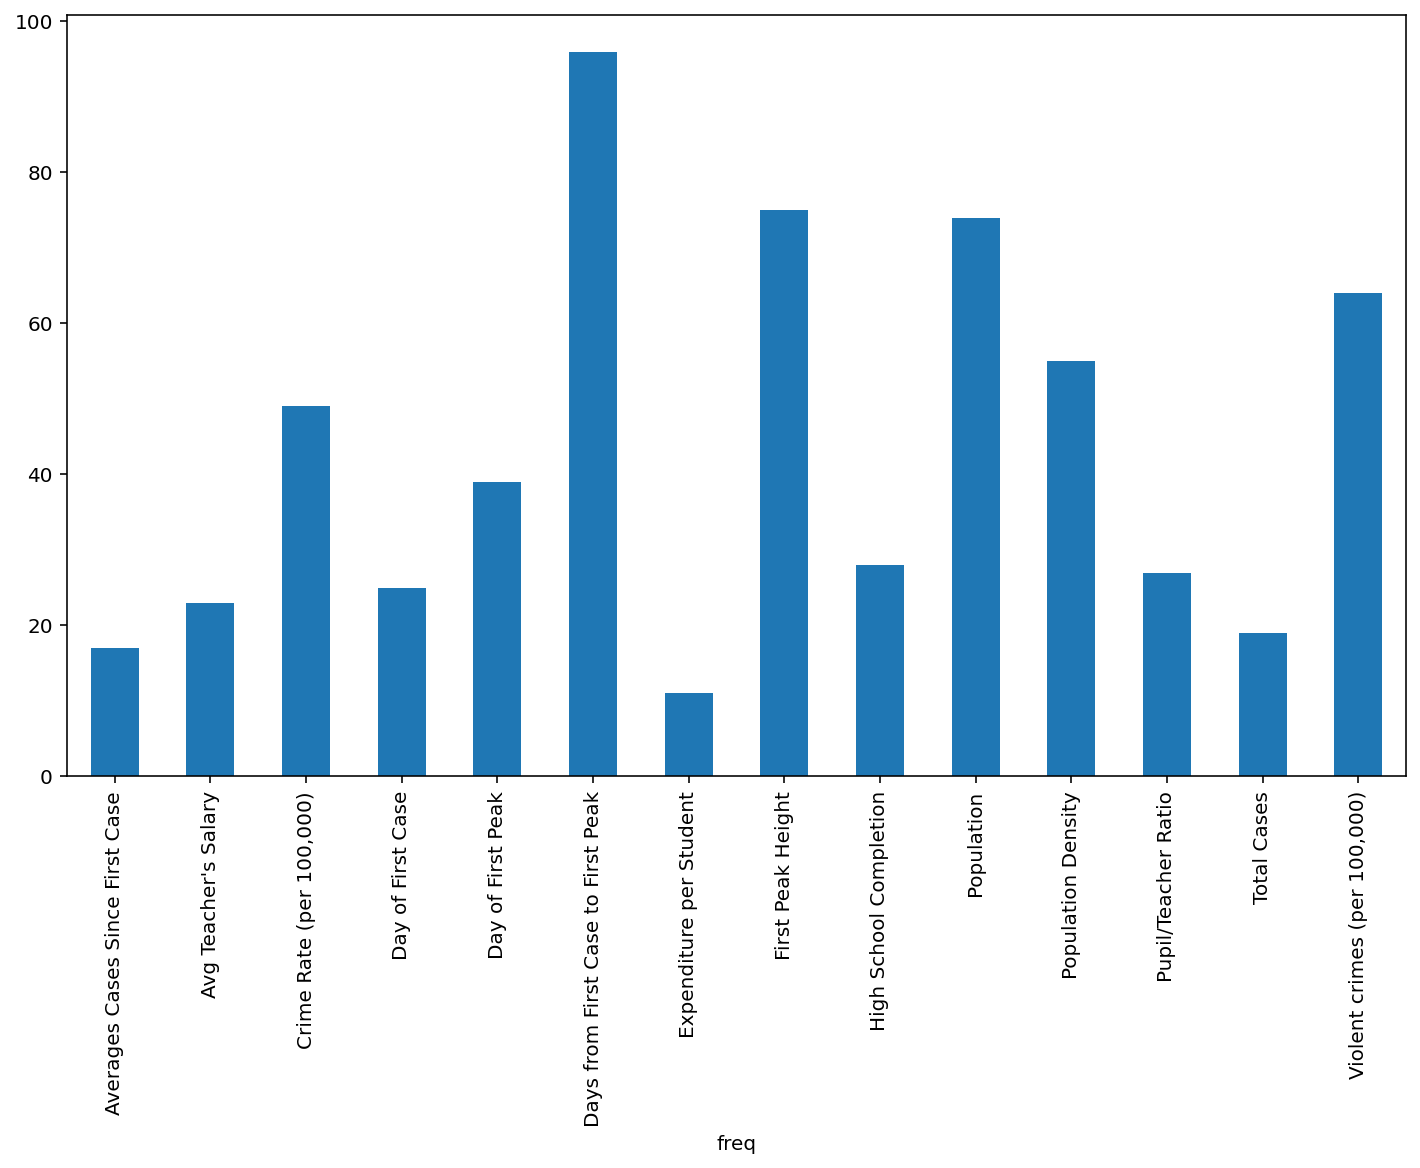

In [155]:
# 5 neighbors

samples = 100
maxLoss = 0.03
neighbors = 5
classifier = 'kNN'

predictors = []

for counter in range(100):
    print(counter)
    data = pandas.read_csv('StateData.csv')
    X = data.drop(['State', 'SecondPeak'], axis=1)
    y = data.SecondPeak.to_numpy()
    for predictor in pruneVariables(X,y,samples,maxLoss,neighbors,classifier)[0]:
        predictors.append(predictor)

df = pd.DataFrame({'freq': predictors})
df.groupby('freq', as_index=False).size().plot(kind='bar')

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


45


46


47


48


49


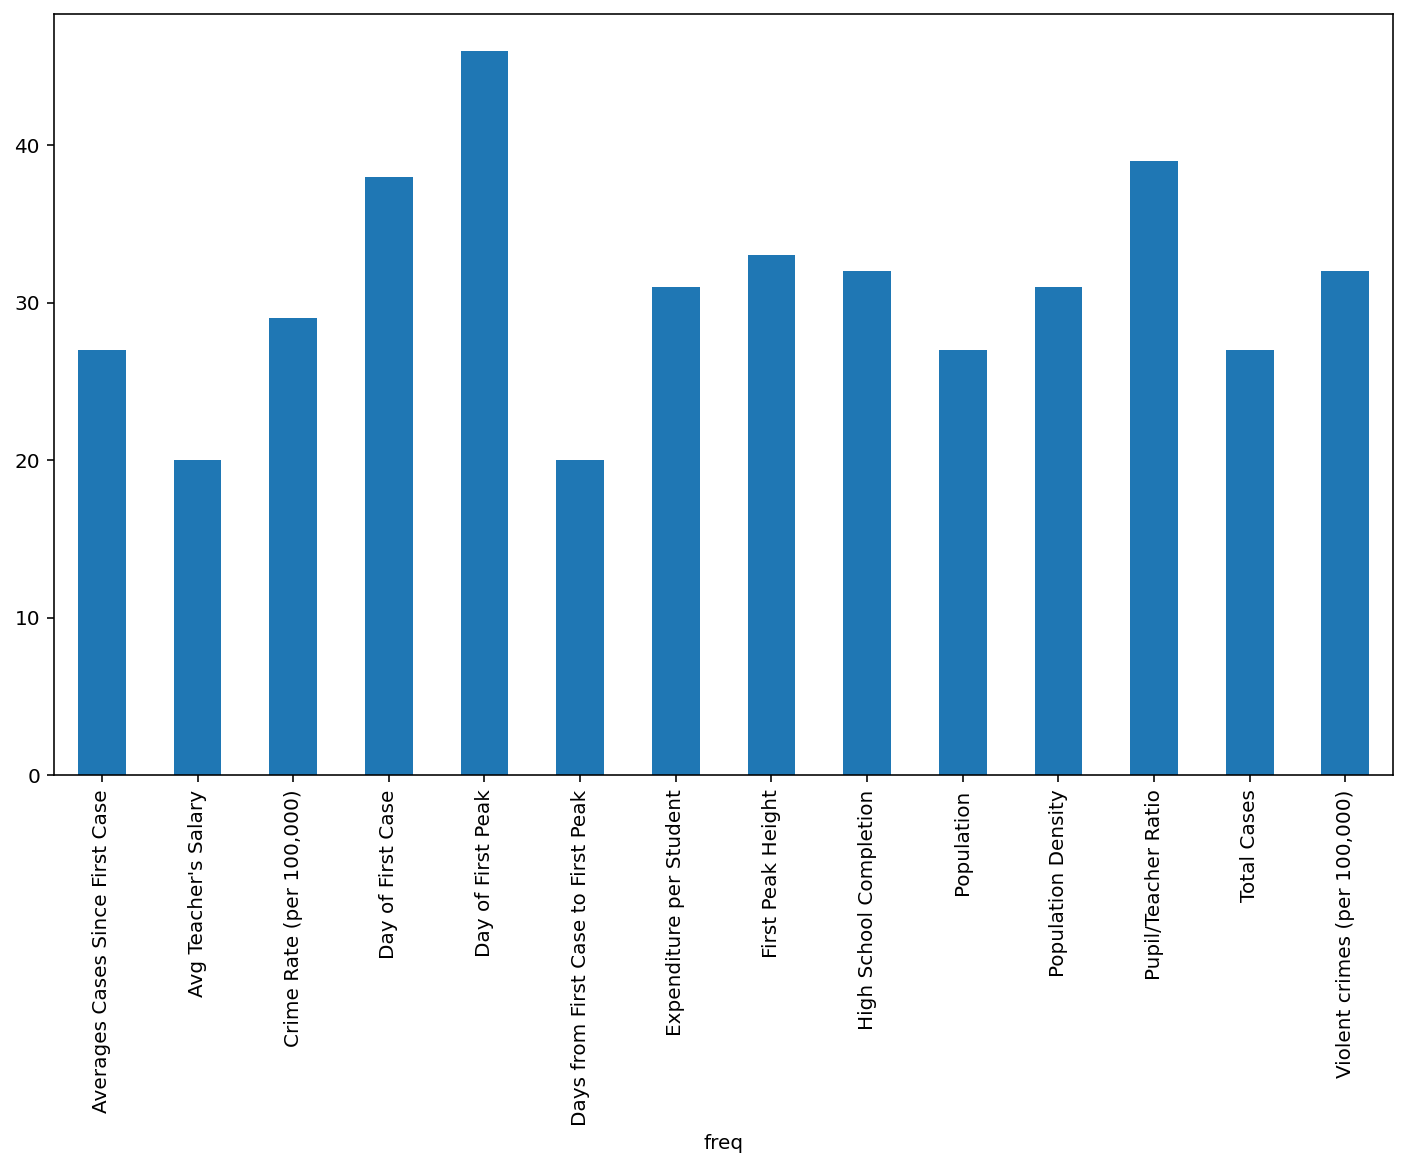

In [13]:
# Using AdaBoost classifier

samples = 1
maxLoss = 0.03
neighbors = 0
classifier = 'AdaBoost'

predictors = []

for counter in range(50):
    print(counter)
    data = pandas.read_csv('StateData.csv')
    X = data.drop(['State', 'SecondPeak'], axis=1)
    y = data.SecondPeak.to_numpy()
    for predictor in pruneVariables(X,y,samples,maxLoss,neighbors,classifier)[0]:
        predictors.append(predictor)

df = pd.DataFrame({'freq': predictors})
df.groupby('freq', as_index=False).size().plot(kind='bar')

0


1


2


3


4


5


6


7


8


9


10


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


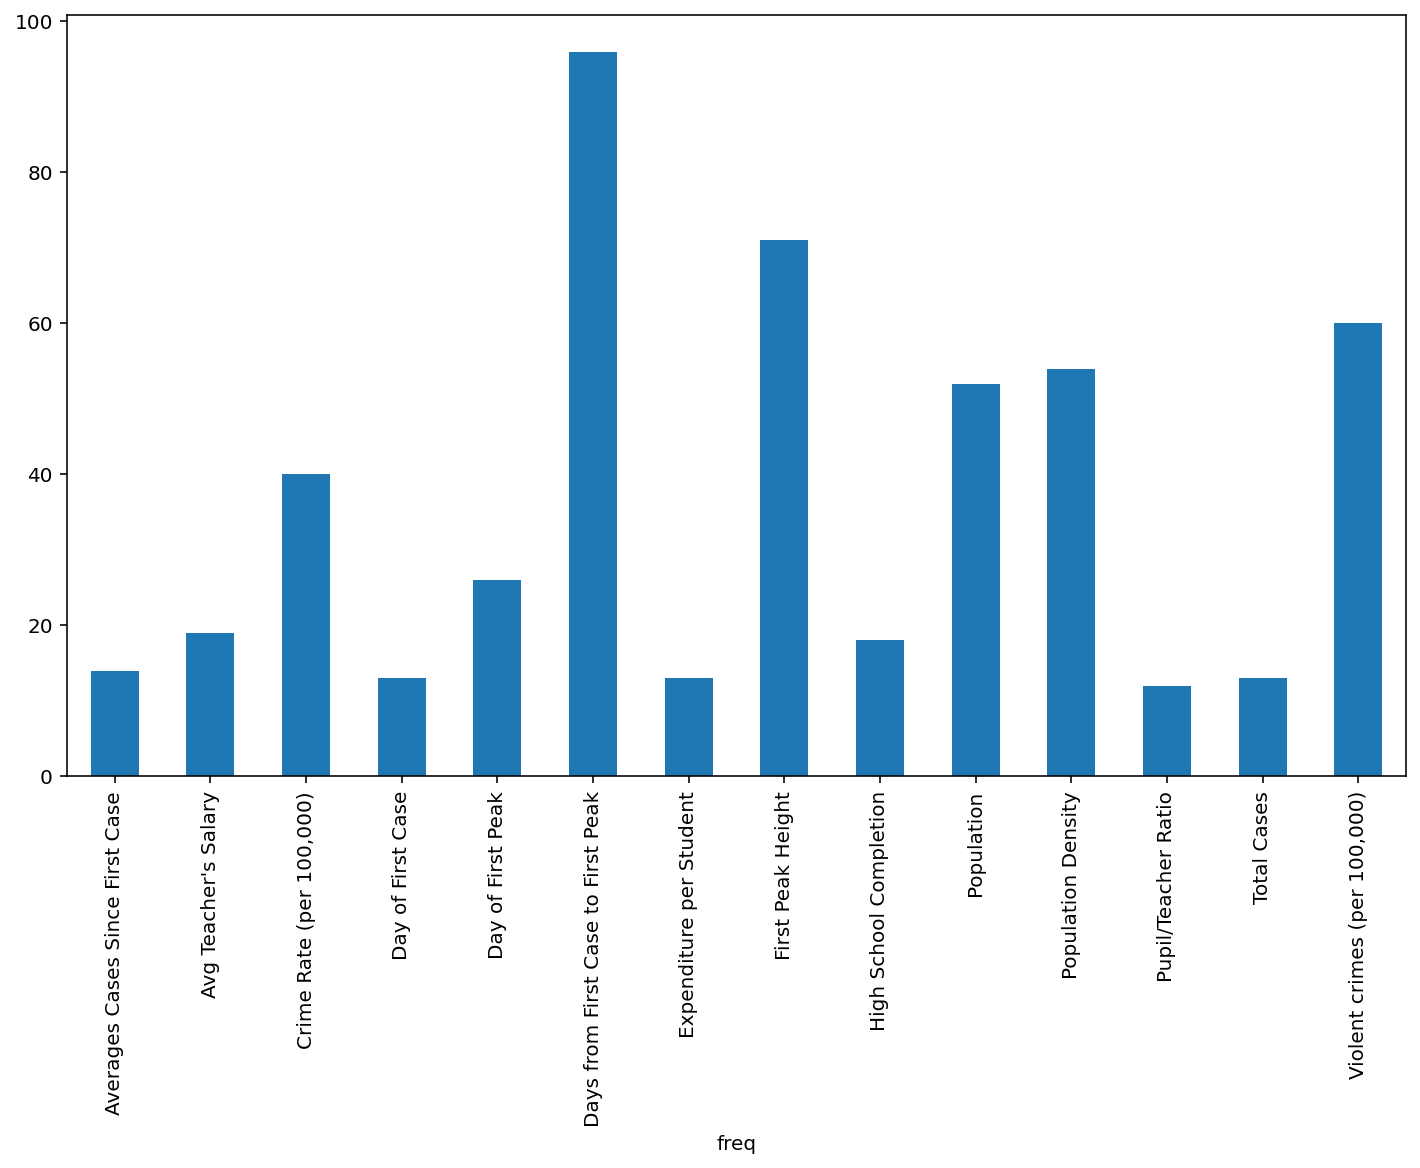

In [14]:
# 7 neighbors

samples = 100
maxLoss = 0.03
neighbors = 7
classifier = 'kNN'

predictors = []

for counter in range(100):
    print(counter)
    data = pandas.read_csv('StateData.csv')
    X = data.drop(['State', 'SecondPeak'], axis=1)
    y = data.SecondPeak.to_numpy()
    for predictor in pruneVariables(X,y,samples,maxLoss,neighbors,classifier)[0]:
        predictors.append(predictor)

df = pd.DataFrame({'freq': predictors})
df.groupby('freq', as_index=False).size().plot(kind='bar')

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


60


61


62


63


64


65


66


67


68


69


70


71


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


72


73


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


74


75


76


77


78


79


80


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98


99


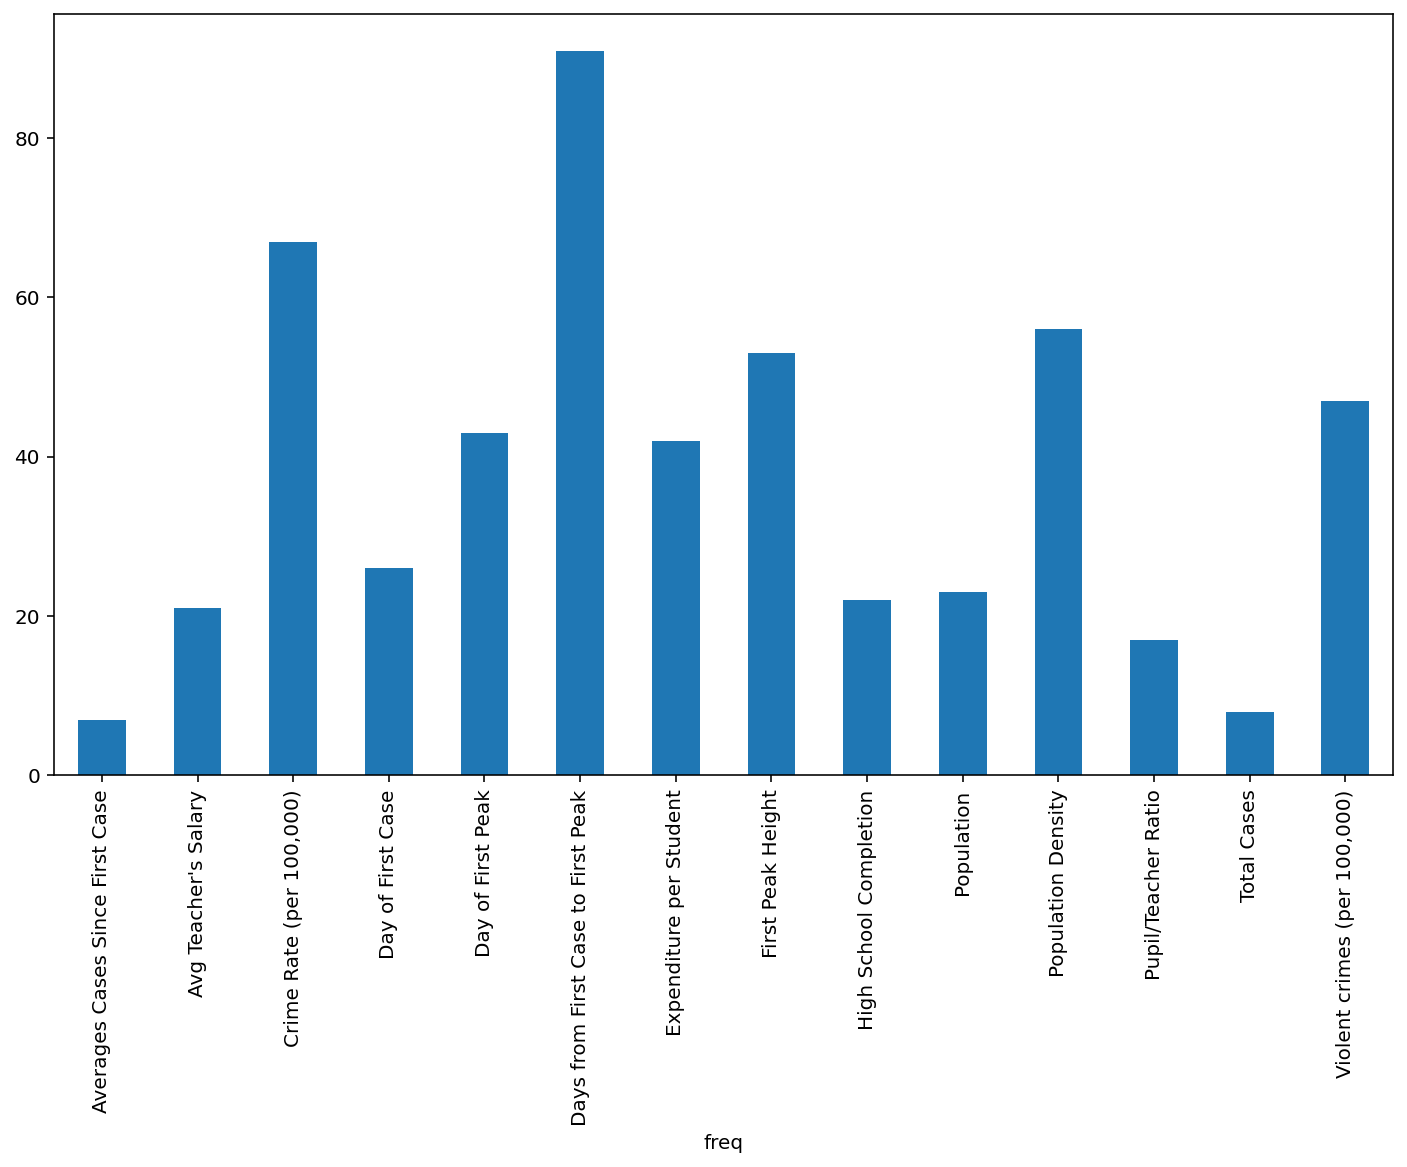

In [6]:
# 10 neighbors

samples = 100
maxLoss = 0.03
neighbors = 10
classifier = 'kNN'

predictors = []

for counter in range(100):
    print(counter)
    data = pandas.read_csv('StateData.csv')
    X = data.drop(['State', 'SecondPeak'], axis=1)
    y = data.SecondPeak.to_numpy()
    for predictor in pruneVariables(X,y,samples,maxLoss,neighbors,classifier)[0]:
        predictors.append(predictor)

df = pd.DataFrame({'freq': predictors})
df.groupby('freq', as_index=False).size().plot(kind='bar')

0


1


2


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5


6


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7


8


9


10


11


12


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


31


32


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


33


34


35


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


36


37


38


39


40


41


42


43


44


45


46


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


47


48


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49


50


51


52


53


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


54


55


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


56


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


57


58


59


60


61


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


62


63


64


65


66


67


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


68


69


70


71


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


72


73


74


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


75


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


76


77


78


79


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80


81


82


83


84


85


86


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


87


88


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89


90


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


91


92


93


94


95


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


96


97


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


98


99


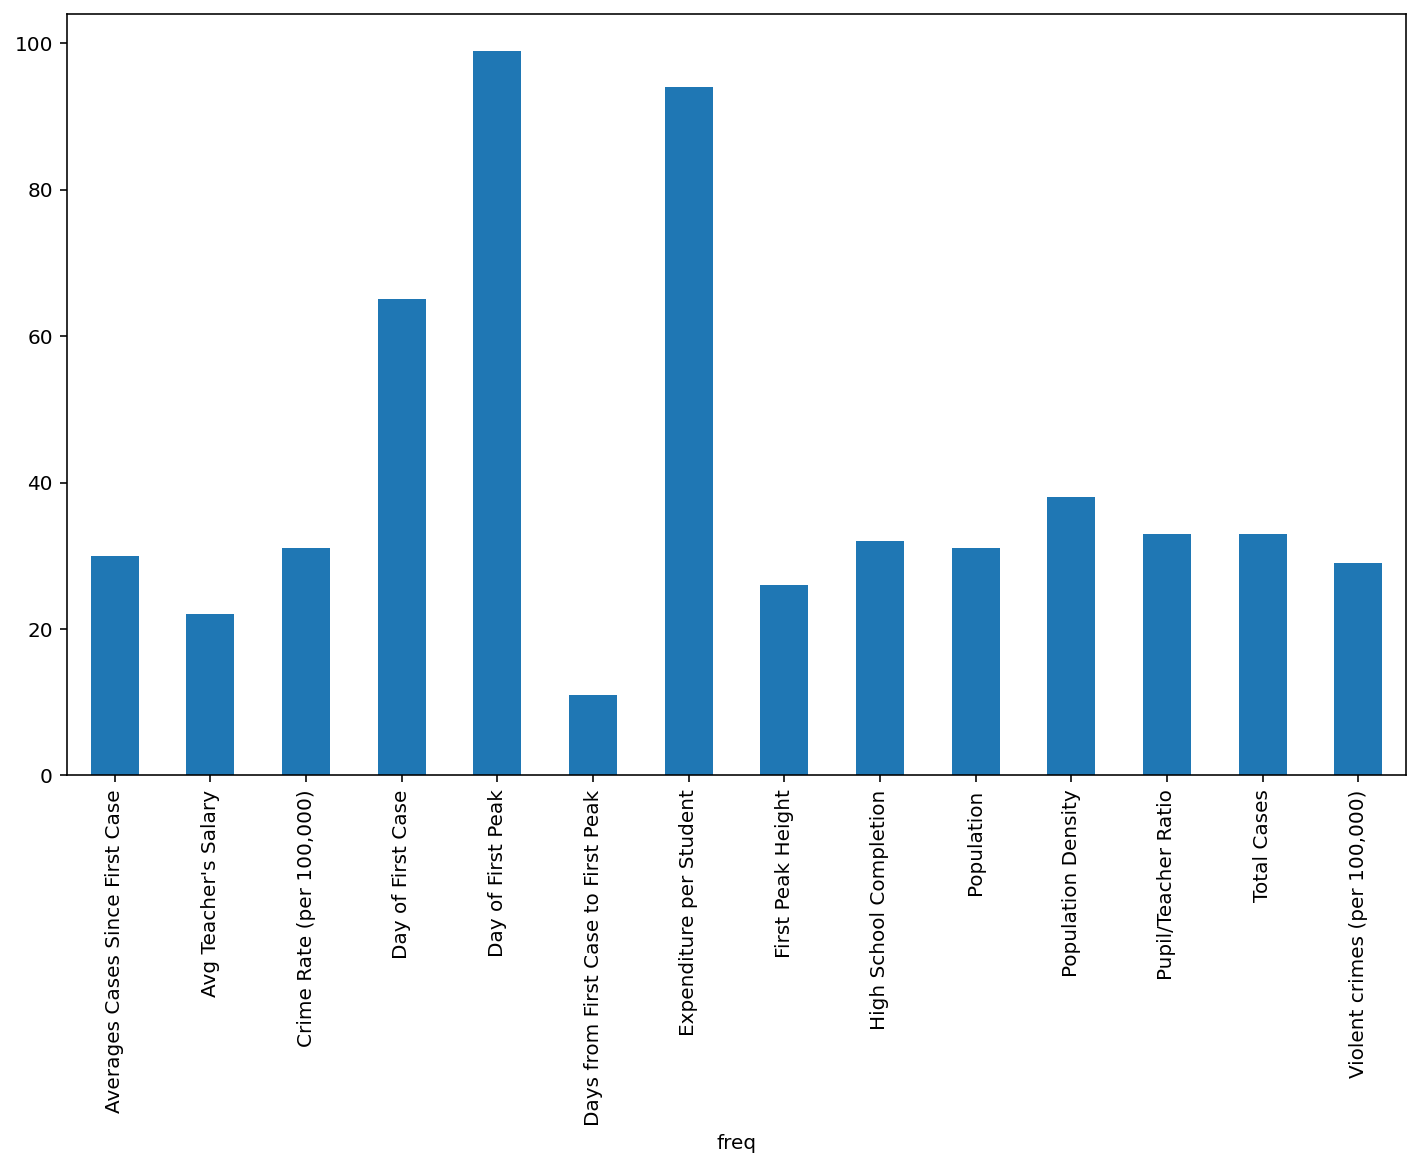

In [23]:
# XGBoost

samples = 100
maxLoss = 0.03
neighbors = 10
classifier = 'XGBoost'

predictors = []

for counter in range(100):
    print(counter)
    data = pandas.read_csv('StateData.csv')
    X = data.drop(['State', 'SecondPeak'], axis=1)
    y = data.SecondPeak.to_numpy()
    for predictor in pruneVariables(X,y,samples,maxLoss,neighbors,classifier)[0]:
        predictors.append(predictor)

df = pd.DataFrame({'freq': predictors})
df.groupby('freq', as_index=False).size().plot(kind='bar')

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


53


54


55


56


57


58


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


59


60


61


62


63


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


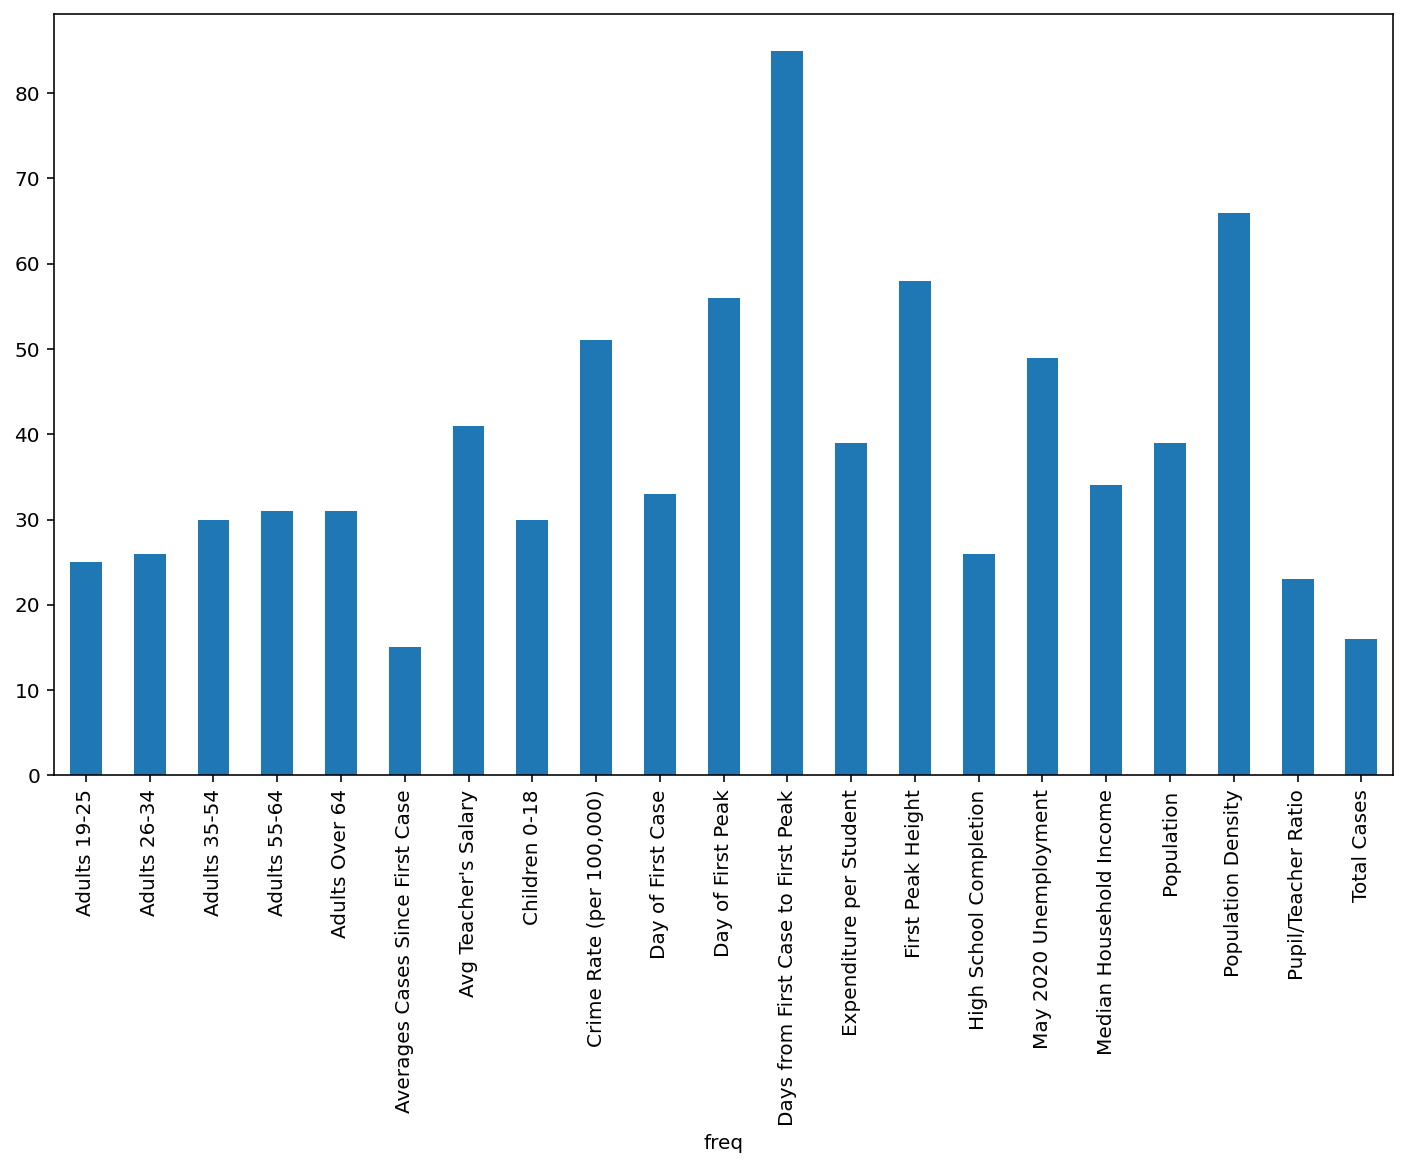

In [23]:
# MODEL WITH BRIANA'S ADDITIONAL DATA

# 7 neighbors

samples = 100
maxLoss = 0.03
neighbors = 7
classifier = 'kNN'

predictors = []

for counter in range(100):
    print(counter)
    data = pandas.read_csv('StateData2.csv')
    X = data.drop(['State', 'SecondPeak'], axis=1)
    y = data.SecondPeak.to_numpy()
    for predictor in pruneVariables(X,y,samples,maxLoss,neighbors,classifier)[0]:
        predictors.append(predictor)

df = pd.DataFrame({'freq': predictors})
df.groupby('freq', as_index=False).size().plot(kind='bar')